# APMTH 207: Advanced Scientific Computing: 
## Stochastic Methods for Data Analysis, Inference and Optimization
## Homework #6
**Harvard University**<br>
**Spring 2017**<br>
**Instructors: Rahul Dave**<br>
**Due Date: ** Thursday, March 9th, 2017 at 11:59pm

**Instructions:**

- Upload your final answers as well as your iPython notebook containing all work to Canvas.

- Structure your notebook and your work to maximize readability.

In [1]:
%matplotlib inline
import numpy as np
from scipy import stats
from scipy.stats import norm
from scipy.stats import beta
from scipy.stats import distributions
import matplotlib.pyplot as plt
import time
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('paper')

## Problem 1: Gibbs Sampling

Let $\mathbf{X}$ be a random variable taking values in $\mathbb{R}^2$. That is, $\mathbf{X}$ is a 2-dimensional vector. Suppose that $\mathbf{X}$ is normally distributed as follows
$$ 
\mathbf{X} \sim \mathcal{N} \left(  
\left[
\begin{array}{c}
    1  \\ 
    2  \\ 
  \end{array} 
\right],
\left[
  \begin{array}{ccc}
    4 & 1.2  \\ 
    1.2 & 4 \\ 
  \end{array} 
  \right] \right).
$$ 
That is, the pdf of the distribution of $\mathbf{X}$ is
$$
f_{\mathbf{X}}(\mathbf{x}) = \frac{1}{2\pi\sqrt{\vert \Sigma\vert }}\mathrm{exp}\left\{ - \frac{1}{2} (\mathbf{x} - \mu)^\top \Sigma^{-1} (\mathbf{x} - \mu)\right\}
$$
where $\mu = \left[
\begin{array}{c}
    1  \\ 
    2  \\ 
  \end{array} 
\right]$, $\Sigma = \left[
  \begin{array}{ccc}
    4 & 1.2  \\ 
    1.2 & 4 \\ 
  \end{array} 
  \right]$, and $\vert \cdot\vert $ is the matrix determinant operator.

In the following, we will denote the random variable corresponding to the first component of $\mathbf{X}$ by $X_1$ and the second component by $X_2$.

### Part A:
Write the Gibbs sampler for this distribution by sampling sequentially from the two conditional distributions $f_{X_1\vert X_2}, f_{X_2\vert X_1}$. Choose a thinning parameter, burn-in factor and total number of iterations that allow you to take 10000 non-autocorrelated draws. You must justify your choice of parameters. 

$$ 
\left[
\begin{array}{c}
    X_1  \\ 
    X_2  \\ 
  \end{array} 
\right] \sim \mathcal{N} \left(  
\left[
\begin{array}{c}
    1  \\ 
    2  \\ 
  \end{array} 
\right],
\left[
  \begin{array}{ccc}
    4 & 1.2  \\ 
    1.2 & 4 \\ 
  \end{array} 
  \right] \right).
$$ 

According to the standard form of bivariate normal:
$$ 
\left[
\begin{array}{c}
    X_1  \\ 
    X_2  \\ 
  \end{array} 
\right] \sim \mathcal{N} \left(  
\left[
\begin{array}{c}
    \mu_1  \\ 
    \mu_2  \\ 
  \end{array} 
\right],
\left[
  \begin{array}{ccc}
    \sigma_1^2 & \rho\sigma_1\sigma_2  \\ 
    \rho\sigma_1\sigma_2 & \sigma_2^2 \\ 
  \end{array} 
  \right] \right).
$$ 


$$ { X }_{ 1 } | { X }_{ 2 }={ x }_{ 2 } \sim N({ \mu  }_{ 1 }+\frac { { \sigma  }_{ 1 } }{ { \sigma  }_{ 2 } } \rho (x_{ 2 }-\mu _{ 2 }),(1-\rho ^{ 2 })\sigma _{ 1 }^{ 2 })$$

$$ { X }_{ 2 } | { X }_{ 1 }={ x }_{ 1 } \sim N({ \mu  }_{2 }+\frac { { \sigma  }_{ 2 } }{ { \sigma  }_{ 1 } } \rho (x_{ 1 }-\mu _{ 1 }),(1-\rho ^{ 2 })\sigma _{ 2 }^{ 2 })$$



Therefore, 
$$
\mu_1 = 1 \\
\mu_2 = 2\\
\sigma_1 = \sigma_2 = 2\\
\rho = 0.3
$$

$$
 { X }_{ 1 } | { X }_{ 2 }={ x }_{ 2 } \sim N(1 + 0.3(x_2-2),3.64) \sim N(0.4 + 0.3x_1,3.64)
$$

$$
 { X }_{ 2 } | { X }_{ 1 }={ x }_{ 1 } \sim N(2 + 0.3(x_1-1),3.64) \sim N(1.7 + 0.3x_2,3.64)
$$

In [2]:
N = 110000
x1all=np.zeros(N+1)
x2all=np.zeros(N+1)
#Initialize x and y.
x1all[0]=1.
x2all[0]=1.
#sig = lambda z,i: np.sqrt(1./(1.+z[i]*z[i]))
mu1 = lambda z,i: 0.4 + 0.3 * z[i]
mu2 = lambda z,i: 1.7 + 0.3 * z[i]
sig = np.sqrt(3.64)

for i in range(1,N,2):
    mu_x1 = mu1(x2all,i-1)
    x1all[i] = np.random.normal(mu_x1, sig)
    x2all[i] = x2all[i-1]  
    
    mu_x2 = mu2(x1all, i)
    x2all[i+1] = np.random.normal(mu_x2, sig)
    x1all[i+1] = x1all[i]
    
def corrplot(trace, maxlags=50):
    plt.acorr(trace-np.mean(trace),  normed=True, maxlags=maxlags);
    plt.xlim([0, maxlags])


Thinning parameter: 10
Burnin factor: 10000
Number of iterations: 110000


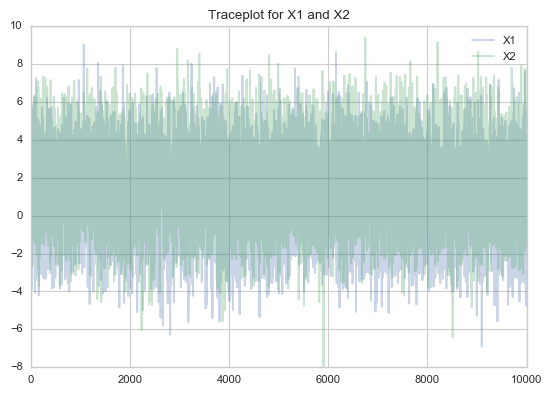

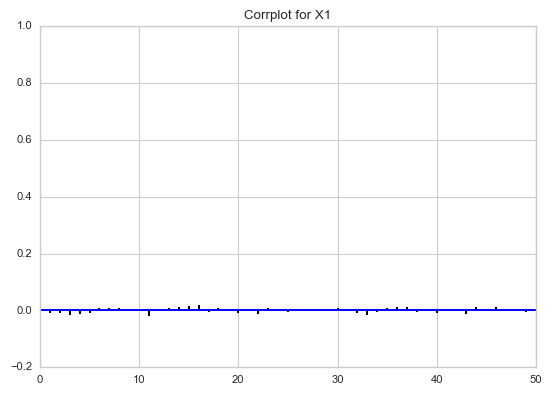

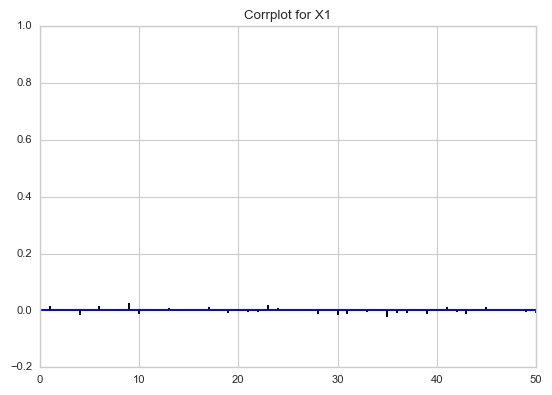

In [3]:
thin = 10
burn = 10000
x1 = x1all[burn::10]
x2 = x2all[burn::10]


print ('Thinning parameter:',thin)
print ('Burnin factor:',burn)
print ('Number of iterations:',N)

plt.plot(x1, alpha=0.3,label='X1')
plt.plot(x2, alpha=0.3,label='X2')
plt.legend()
plt.title('Traceplot for X1 and X2')
plt.show()

corrplot(x1)
plt.title('Corrplot for X1')
#plt.xlim(1,)

plt.show()
corrplot(x2)
plt.title('Corrplot for X1')
#plt.xlim(1,)
plt.show()


#plt.title('traceplot for X2',label = 'X2')


### Summary

Based on my selected thinning parameter and burning factor, I set the total iteration to be 110000 to make sure that I can take 10000 non-autocorrelated draws. According to the traceplots for X1 and X2, both of them show white noice, which indicates that the drawn points are uncorrelated. In addition, as show in the corrplot, we can find that the correlation is very low for each plot. 

## Problem 2: Bayesian Inference and All That
In the competitive rubber chicken retail market, the success of a company is built on satisfying the exacting standards of a consumer base with refined and discriminating taste. In particular, customer product reviews are all important. But how should we judge the quality of a product based on customer reviews?

On Amazon, the first customer review statistic displayed for a product is the ***average rating***. The following are the main product pages for two competing rubber chicken products, manufactured by Lotus World and Toysmith respectively:


Lotus World |  Toysmith
- |  - 
![alt](lotus1.png) |  ![alt](toysmith1.png)

Clicking on the 'customer review' link on the product pages takes us to a detailed break-down of the reviews. In particular, we can now see the number of times a product is rated a given rating (between 1 and 5 stars).

Lotus World |  Toysmith
- |  - 
![alt](lotus2.png) |  ![alt](toysmith2.png)


In the following, we will ask you to compare these two products using the various rating statistics. Larger versions of the images are available in the data set accompanying this notebook.

Suppose that for each product, we can model the probability of the value each new rating as the following vector:
$$
\theta = [\theta_1, \theta_2, \theta_3, \theta_4, \theta_5]
$$
where $\theta_i$ is the probability that a given customer will give the product $i$ number of stars.


### Part A: Inference

- Suppose you are told that customer opinions are very polarized in the retail world of rubber chickens, that is, most reviews will be 5 stars or 1 stars (with little middle ground). Choose an appropriate Dirichlet prior for $\theta$. Recall that the Dirichlet pdf is given by:
$$
f_{\Theta}(\theta) = \frac{1}{B(\alpha)} \prod_{i=1}^k \theta_i^{\alpha_i - 1}, \quad B(\alpha) = \frac{\prod_{i=1}^k\Gamma(\alpha_i)}{\Gamma\left(\sum_{i=1}^k\alpha_i\right)},
$$
where $\theta_i \in (0, 1)$ and $\sum_{i=1}^k \theta_i = 1$, $\alpha_i > 0 $ for $i = 1, \ldots, k$.

- Write an expression for the posterior pdf, using a using a multinomial model for observed ratings. Recall that the multinomial pdf is given by:
$$
f_{\mathbf{X}\vert  \Theta}(\mathbf{x}) = \frac{n!}{x_1! \ldots x_k!} \theta_1^{x_1} \ldots \theta_k^{x_k}
$$
where $n$ is the total number of trials, $\theta_i$ is the probability of event $i$ and $\sum_i \theta_i = 1$, and $x_i$ is count of outcome $i$ and $\sum_i x_i = n$. 

  **Note:** The data you will need in order to define the likelihood function should be read off the image files included in the dataset.
  

- Sample 1,000 values of $\theta$ from the *posterior distribution*.
 
- Sample 1,000 values of $\theta$ from the *posterior predictive distribution*.


### Part B: Ranking

- Name at least two major potential problems with using only the average customer ratings to compare products.

  (**Hint:** if product 1 has a higher average rating than product 2, can we conclude that product 1 is better liked? If product 1 and product 2 have the same average rating, can we conclude that they are equally good?)
  

- Using the samples from your *posterior distribution*, determine which rubber chicken product is superior. Justify your conclusion with sample statistics.

- Using the samples from your *posterior predictive distribution*, determine which rubber chicken product is superior. Justify your conclusion with sample statistics.

- Finally, which rubber chicken product is superior?

  (**Note:** we're not looking for "the correct answer" here, any sound decision based on a statistically correct interpretation of your model will be fine)

### Part A: Inference

- Suppose you are told that customer opinions are very polarized in the retail world of rubber chickens, that is, most reviews will be 5 stars or 1 stars (with little middle ground). Choose an appropriate Dirichlet prior for $\theta$. Recall that the Dirichlet pdf is given by:
$$
f_{\Theta}(\theta) = \frac{1}{B(\alpha)} \prod_{i=1}^k \theta_i^{\alpha_i - 1}, \quad B(\alpha) = \frac{\prod_{i=1}^k\Gamma(\alpha_i)}{\Gamma\left(\sum_{i=1}^k\alpha_i\right)},
$$
where $\theta_i \in (0, 1)$ and $\sum_{i=1}^k \theta_i = 1$, $\alpha_i > 0 $ for $i = 1, \ldots, k$.

- Write an expression for the posterior pdf, using a using a multinomial model for observed ratings. Recall that the multinomial pdf is given by:
$$
f_{\mathbf{X}\vert  \Theta}(\mathbf{x}) = \frac{n!}{x_1! \ldots x_k!} \theta_1^{x_1} \ldots \theta_k^{x_k}
$$
where $n$ is the total number of trials, $\theta_i$ is the probability of event $i$ and $\sum_i \theta_i = 1$, and $x_i$ is count of outcome $i$ and $\sum_i x_i = n$. 

  **Note:** The data you will need in order to define the likelihood function should be read off the image files included in the dataset.
  

- Sample 1,000 values of $\theta$ from the *posterior distribution*.
 
- Sample 1,000 values of $\theta$ from the *posterior predictive distribution*.

### Sample 1,000 values of  $\theta$  from the posterior distribution.

Given prior: $$ f_{\Theta}(\theta) = \frac{1}{B(\alpha)} \prod_{i=1}^k \theta_i^{\alpha_i - 1}, \quad B(\alpha) = \frac{\prod_{i=1}^k\Gamma(\alpha_i)}{\Gamma\left(\sum_{i=1}^k\alpha_i\right)}$$


Given likelihood: $$
f_{\mathbf{X}\vert  \Theta}(\mathbf{x}) = \frac{n!}{x_1! \ldots x_k!} \theta_1^{x_1} \ldots \theta_k^{x_k}
$$


Posterior distribution: 
$$
P( \theta | x_{ 1 },x_{ 2 }...x_{ n }) \quad \propto \quad \prod _{ i=1 }^{ n }{ \prod _{ j=1 }^{ k }{ \theta _{ j }^{ x_{ ij } } } \prod _{ j=1 }^{ k }{ \theta _{ j }^{ \alpha _{ j }-1 }=\prod _{ j=1 }^{ k }{ \theta _{ j }^{ \sum _{ i=1 }^{ n }{ x_{ ij }+\alpha _{ j }-1 }  } }  }  } 
$$

$$
\theta  | x_{ 1 },x_{ 2 }...x_{ n } \sim Dirichlet(\alpha +n \bar{ X })
$$

As the question says, most reviews will be 5 stars or 1 stars (with little middle ground), we can make $\alpha_1$ and $\alpha_5$ greater than other $\alpha^{'}$s. Therefore,  my prior is set to be [0.35,0.1,0.1,0.1,0.35] in this scenario. 


As shown inthe screenshot, there are 162 reviews for lotus and 410 for toysmith, 
- lotus: rate1: 6%, rate2: 4%, rate3: 6%, rate4: 17%, rate5: 67%. 

- ToySmith: rate1: 14%, rate2: 8%, rate3: 7%, rate4: 11%, rate5: 60%. 




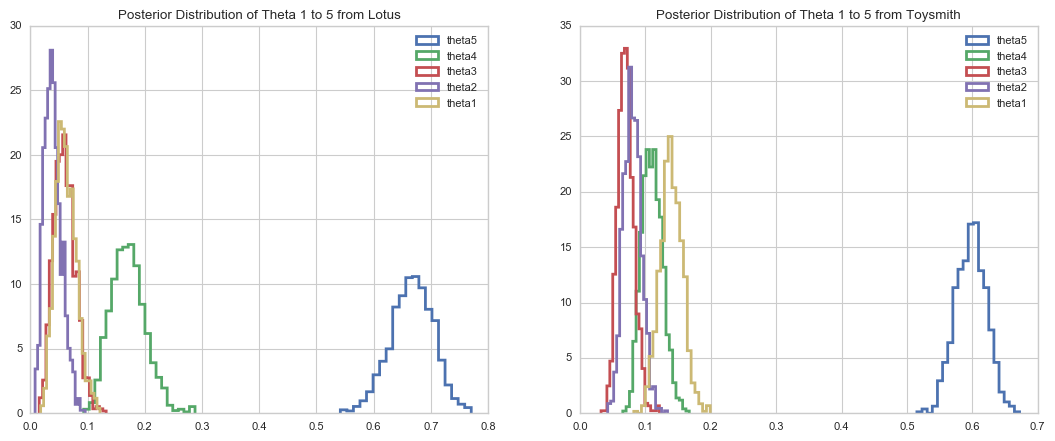

In [4]:
k = 5
alphas = np.array([0.35, 0.1, 0.1, 0.1, 0.35], dtype=float) 
x_lotus = np.array([0.67, 0.17, 0.06, 0.04, 0.06], dtype=float) 
x_toys = np.array([0.6, 0.11, 0.07, 0.08, 0.14], dtype=float) 
n_draw = 1000
posteri_lotus = np.random.dirichlet(x_lotus * 162 + alphas, n_draw)
posteri_toys = np.random.dirichlet(x_toys * 410 + alphas, n_draw)

plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.title('Posterior Distribution of Theta 1 to 5 from Lotus')
plt.hist(posteri_lotus[:,0],bins = 20, normed=True,linewidth=2,histtype='step',label = 'theta5')
plt.hist(posteri_lotus[:,1],bins = 20,normed=True,linewidth=2, histtype='step',label = 'theta4')
plt.hist(posteri_lotus[:,2],bins = 20,normed=True,linewidth=2, histtype='step',label = 'theta3')
plt.hist(posteri_lotus[:,3],bins = 20,normed=True, linewidth=2,histtype='step',label = 'theta2')
plt.hist(posteri_lotus[:,4],bins = 20,normed=True,linewidth=2, histtype='step',label = 'theta1')
plt.legend()
#plt.show()
plt.subplot(1,2,2)
plt.title('Posterior Distribution of Theta 1 to 5 from Toysmith')
plt.hist(posteri_toys[:,0],bins = 20, normed=True,linewidth=2,histtype='step',label = 'theta5')
plt.hist(posteri_toys[:,1],bins = 20,normed=True,linewidth=2, histtype='step',label = 'theta4')
plt.hist(posteri_toys[:,2],bins = 20,normed=True,linewidth=2, histtype='step',label = 'theta3')
plt.hist(posteri_toys[:,3],bins = 20,normed=True, linewidth=2,histtype='step',label = 'theta2')
plt.hist(posteri_toys[:,4],bins = 20,normed=True,linewidth=2, histtype='step',label = 'theta1')
plt.legend()
plt.show()



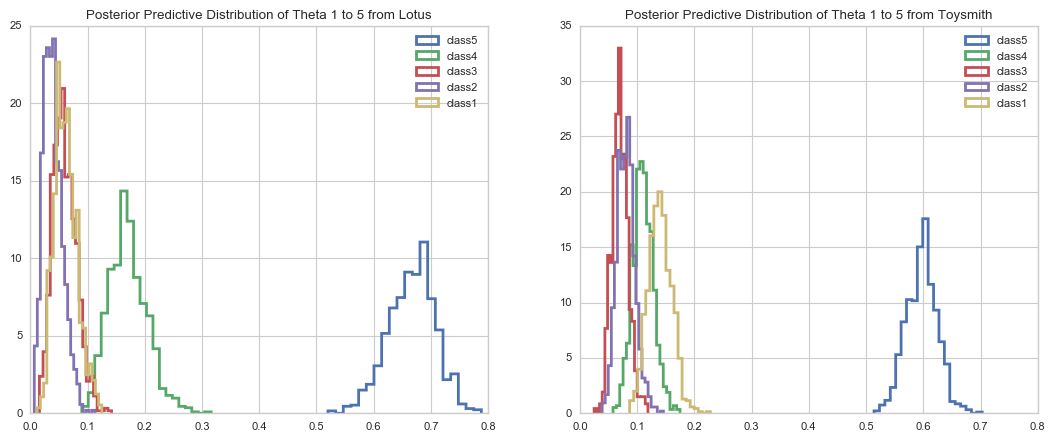

In [8]:
N = 1000
ite = 1000
postpred_lotus = np.zeros((N,k))
pos_pre_Lotus_list = np.zeros((N,k))
pos_pre_Toys_list = np.zeros((N,k))
for i in range(ite):
    for j in range (N):
        postpred_lotus[j,:] = np.random.multinomial(1, posteri_lotus[i,:])

    postpred_toys =np.zeros((N,k))
    for j in range (N):
        postpred_toys[j,:] = np.random.multinomial(1, posteri_toys[i,:])

    pos_pre_Lotus_list[i,:] = (np.mean(postpred_lotus, axis=0))
    pos_pre_Toys_list[i,:] = (np.mean(postpred_toys, axis=0))
    
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.title('Posterior Predictive Distribution of Theta 1 to 5 from Lotus')
plt.hist(pos_pre_Lotus_list[:,0],bins = 20, normed=True,linewidth=2,histtype='step',label = 'class5')
plt.hist(pos_pre_Lotus_list[:,1],bins = 20,normed=True,linewidth=2, histtype='step',label = 'class4')
plt.hist(pos_pre_Lotus_list[:,2],bins = 20,normed=True,linewidth=2, histtype='step',label = 'class3')
plt.hist(pos_pre_Lotus_list[:,3],bins = 20,normed=True, linewidth=2,histtype='step',label = 'class2')
plt.hist(pos_pre_Lotus_list[:,4],bins = 20,normed=True,linewidth=2, histtype='step',label = 'class1')
plt.legend()
#plt.show()
plt.subplot(1,2,2)
plt.title('Posterior Predictive Distribution of Theta 1 to 5 from Toysmith')
plt.hist(pos_pre_Toys_list[:,0],bins = 20, normed=True,linewidth=2,histtype='step',label = 'class5')
plt.hist(pos_pre_Toys_list[:,1],bins = 20,normed=True,linewidth=2, histtype='step',label = 'class4')
plt.hist(pos_pre_Toys_list[:,2],bins = 20,normed=True,linewidth=2, histtype='step',label = 'class3')
plt.hist(pos_pre_Toys_list[:,3],bins = 20,normed=True, linewidth=2,histtype='step',label = 'class2')
plt.hist(pos_pre_Toys_list[:,4],bins = 20,normed=True,linewidth=2, histtype='step',label = 'class1')
plt.legend()
plt.show()




In [9]:
print ('Posterior predictive for Lotus (Mean):',np.mean(pos_pre_Lotus_list, axis=0))
print ('Posterior predictive for Toysmith (Mean):',np.mean(pos_pre_Toys_list, axis=0))


Posterior predictive for Lotus (Mean): [ 0.66688   0.17127   0.059974  0.039752  0.062124]
Posterior predictive for Toysmith (Mean): [ 0.597587  0.110633  0.070534  0.080843  0.140403]


In [11]:
pos_pre_Lotus = np.mean(pos_pre_Lotus_list, axis=0)
star = np.array([5,4,3,2,1])
rate_Lotus = star .dot (pos_pre_Lotus)
print ('Predictive rating for Lotus :', rate_Lotus)

pos_pre_Toys = np.mean(pos_pre_Toys_list, axis=0)
rate_Toysmith = star .dot (pos_pre_Toys)
print ('Predictive rating Toysmith:', rate_Toysmith)

Predictive rating for Lotus : 4.34103
Predictive rating Toysmith: 3.944158


### Part B: Ranking

- Name at least two major potential problems with using only the average customer ratings to compare products.

  (**Hint:** if product 1 has a higher average rating than product 2, can we conclude that product 1 is better liked? If product 1 and product 2 have the same average rating, can we conclude that they are equally good?)
  

- Using the samples from your *posterior distribution*, determine which rubber chicken product is superior. Justify your conclusion with sample statistics.

- Using the samples from your *posterior predictive distribution*, determine which rubber chicken product is superior. Justify your conclusion with sample statistics.

- Finally, which rubber chicken product is superior?

  (**Note:** we're not looking for "the correct answer" here, any sound decision based on a statistically correct interpretation of your model will be fine)

Here are two potential problems using only the average customer ratings:
1. Althouhgh the rating for the product from Lotus is slightly higher than that from Toysmith, we could not ensure that the product from Lotus is better. Since the sample size of reviews from Lotus is smaller than that from Toysmith, without using any predictive techniques, intuitively, the product in Toysmith looks better as more customers come to buy. Thus we could not simplily consider that the product in Lotus is better. Given a extreme case, assume there is only one review with 5 stars in Lotus, and lots of reviews in Toysmith with 999 5 stars and 1 4 star. It looks the average star rate is 5 for Lotus which is higher than 4.999 for Toysmith, but we cannot conclude that the product in Lotus is better since it does not make any sense to consider the average rating for only one sample. 

2. Except for looking at the average rating, the rating distribution may offer more information to us. In fact, if we only consider the average rating, some extreme cases may be ignored. For example, if the number of reviews and average ratings of the product in two shops is the same, the rating for half reviews is 1 star and the other half is 5 stars in shop 1, the rating for shop 2 is basically distributed around 3 stars. In this case, we could not conclude that the two shops have the same performance depending on the equal average rating.

### Using the samples from your posterior distribution, determine which rubber chicken product is superior.

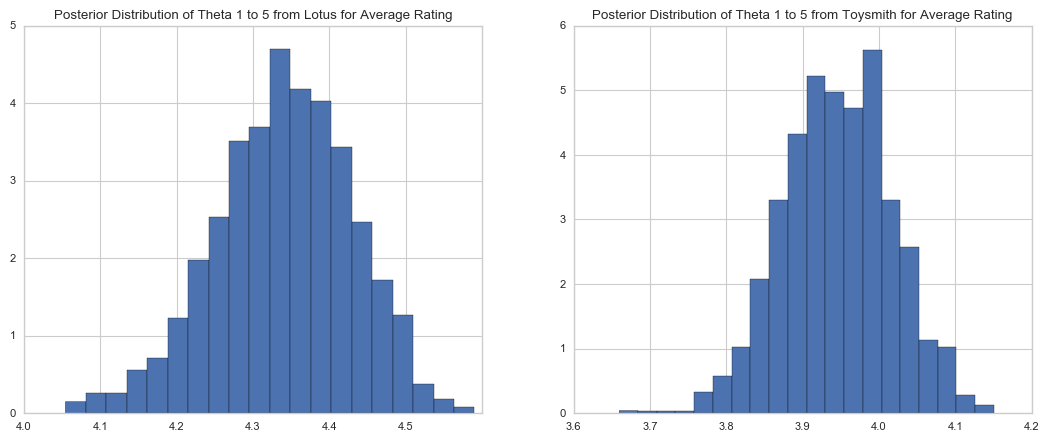

In [12]:
pos_Lotus_list = (posteri_lotus .dot (star))
pos_Toys_list = (posteri_toys .dot (star))

plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.title('Posterior Distribution of Theta 1 to 5 from Lotus for Average Rating')
plt.hist(pos_Lotus_list,bins = 20, normed=True)

plt.subplot(1,2,2)
plt.title('Posterior Distribution of Theta 1 to 5 from Toysmith for Average Rating')
plt.hist(pos_Toys_list,bins = 20, normed=True)
plt.show()

In [13]:
print ('Mean from Posterior Averaging Rating Distribution of Lotus',np.mean(pos_Lotus_list))
print('Standard Deviation from Posterior Averaging Rating Distribution of Lotus:',np.std(pos_Lotus_list) )
print ('\n')
print ('Mean from Posterior Averaging Rating Distribution of Toysmith',np.mean(pos_Toys_list))
print('Standard Deviation from Posterior Averaging Rating Distribution of Toysmith:',np.std(pos_Toys_list) )

Mean from Posterior Averaging Rating Distribution of Lotus 4.34054352284
Standard Deviation from Posterior Averaging Rating Distribution of Lotus: 0.0901126766778


Mean from Posterior Averaging Rating Distribution of Toysmith 3.94627712769
Standard Deviation from Posterior Averaging Rating Distribution of Toysmith: 0.0712064381678


### Summary
As shown in these two plot above, the mean of averaging rating distribution of Lotus is smaller than that of Toysmith, and their variance are very close (they are not extreme case as I mentioned before) we can basically get the conclusion that Lotus is superior.

### Using the samples from your posterior predictive distribution, determine which rubber chicken product is superior. Justify your conclusion with sample statistics.

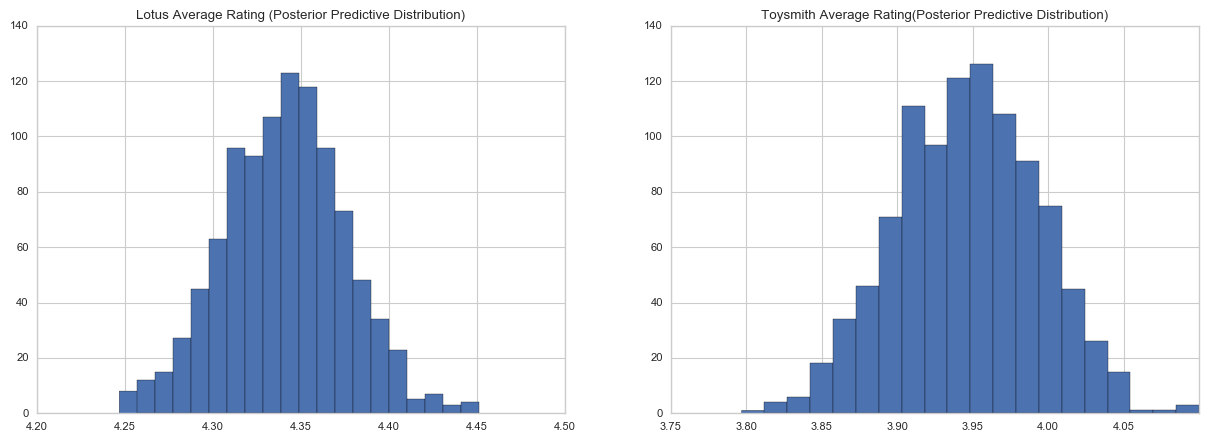

In [14]:
ite = 1000
po_dist_Lotus = []
po_dist_Toys = []
for i in range (ite):
    postpred_lotus = np.zeros((N,k))
    for i in range (N):
        postpred_lotus[i,:] = np.random.multinomial(1, posteri_lotus[i,:])

    postpred_toys =np.zeros((N,k))
    for i in range (N):
        postpred_toys[i,:] = np.random.multinomial(1, posteri_toys[i,:])

    
    pos_pre_Lotus = np.mean(postpred_lotus, axis=0)
    rate_Lotus = star .dot (pos_pre_Lotus)
    po_dist_Lotus.append(rate_Lotus)
    pos_pre_Toys = np.mean(postpred_toys, axis=0)
    rate_Toysmith = star .dot (pos_pre_Toys)
    po_dist_Toys.append(rate_Toysmith)

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax1.set_title('Lotus Average Rating (Posterior Predictive Distribution)')
ax1.hist(po_dist_Lotus, bins=20);

ax2 = fig.add_subplot(1,2,2)
ax2.set_title('Toysmith Average Rating(Posterior Predictive Distribution)')
ax2.hist(po_dist_Toys, bins=20)
plt.show()
    

In [15]:
print ('Mean from Posterior Predictive Averaging Rating Distribution of Lotus',np.mean(po_dist_Lotus))
print('Standard Deviation from Posterior Predictive Averaging Rating Distribution of Lotus:',np.std(po_dist_Lotus) )
print ('\n')
print ('Mean from Posterior Predictive Averaging Rating Distribution of Toysmith',np.mean(po_dist_Toys))
print('Standard Deviation from Posterior Predictive Averaging Rating Distribution of Toysmith:',np.std(po_dist_Toys) )

Mean from Posterior Predictive Averaging Rating Distribution of Lotus 4.34062
Standard Deviation from Posterior Predictive Averaging Rating Distribution of Lotus: 0.0341970700499


Mean from Posterior Predictive Averaging Rating Distribution of Toysmith 3.946539
Standard Deviation from Posterior Predictive Averaging Rating Distribution of Toysmith: 0.0471932673058


As shown in these two plot above, the mean of averaging rating distribution using posterior predictive of Lotus is smaller than that of Toysmith, and their variance are very close and smaller than that with posterior distribution (they are not extreme case as I mentioned before) we can basically get the conclusion that Lotus is superior.

### Conclusion

According to the calculated mean and variance based on posterior distribution and posterior predictive distribution of the average rating, it shows that Lotus is superior. On the other hand, if we directly look at the distribution of each class (star 1,2,3,4,5) as shown in part A, we can also find that for Lotus, reviews with star 5 and star 4 have a relatively large probability, while Toysmith shows that the only 5 star has a larger probability and other stars (like 4 star) have a very small distribution. Based on the observations, we can conlcude that Lotus is superior. 